## Transformation of Features

why is it required?

   1. Linear Regression- Gradient Descent finding the global minima.
   2. KNN, K-means, Hierarichal Clustering finding the Eucledian Distance.

### Standardization 

Standardization wis required when the dataset have large differences between their ranges or when they are measured in different measurement usnits.<br>

We try to bring all the variables to a similar scale by trying to shift the distribtion towards zero, z= (x-x_mean)/std.

In [9]:
import pandas as pd
df = pd.read_csv('titanic.csv', usecols=['Pclass', 'Age', 'Fare', 'Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [10]:
df['Age'].isnull().sum()

177

In [11]:
##age has some null values can be checked- filling the missing values using median

df['Age'].fillna(df.Age.median(), inplace= True)

In [12]:
df['Age'].isnull().sum()

0

In [13]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [14]:
##diving into dependent and independent features

X = df.iloc[:,1:]
y = df.iloc[:,0]

In [18]:
##Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [19]:
X_train

,Pclass,Age,Fare
6,1,54.0,51.8625
718,3,28.0,15.5000
685,2,25.0,41.5792
73,3,26.0,14.4542
882,3,22.0,10.5167
...,...,...,...
106,3,21.0,7.6500
270,1,28.0,31.0000
860,3,41.0,14.1083
435,1,14.0,120.0000


<AxesSubplot:xlabel='Age', ylabel='Count'>

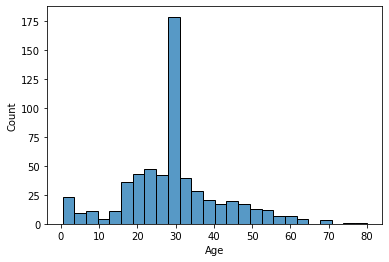

In [35]:
import seaborn as sns
sns.histplot(data=X_train, x="Age")

In [40]:
np.mean(X_train['Age'])

29.22385906040268

Observation: Distribution is approximately centered at 30.

<AxesSubplot:xlabel='Fare', ylabel='Count'>

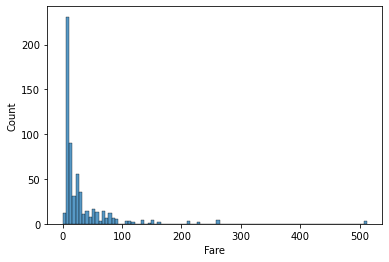

In [36]:
import seaborn as sns
sns.histplot(data=X_train, x="Fare")

In [20]:
####Standardization: We use the Standardscaler from sklearn library

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std_scaled = scaler.fit_transform(X_train)

## features will be scaled down in shuch a way that mean will be 0 and std will be 1.

In [21]:
X_train_std_scaled

array([[-1.62580285,  1.91349292,  0.38784185],
       [ 0.80576177, -0.09452019, -0.31908053],
       [-0.41002054, -0.32621401,  0.18792449],
       ...,
       [ 0.80576177,  0.90948636, -0.34613654],
       [-1.62580285, -1.17575802,  1.71250117],
       [-1.62580285, -0.63513911,  0.8821286 ]])

In [27]:
import numpy as np
print(np.mean(X_train_std_scaled[:,2]), np.std(X_train_std_scaled[:,2]))

5.364836092148408e-17 1.0


<AxesSubplot:ylabel='Count'>

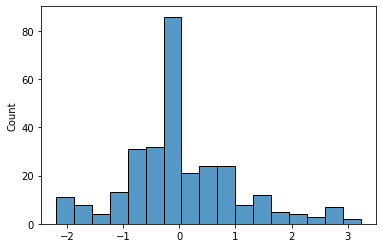

In [38]:
sns.histplot(data=X_test_std_scaled[:,1])

Observation: Mean shifts towards 0 and std is 1.

<AxesSubplot:ylabel='Count'>

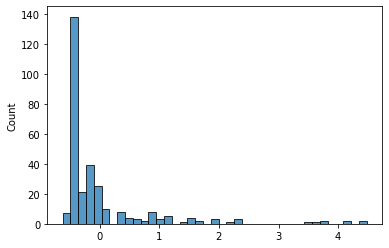

In [39]:
sns.histplot(data=X_test_std_scaled[:,2])

In [28]:
## Scale down the test data
X_test_std_scaled = scaler.transform(X_test)

In [29]:
X_test_std_scaled

array([[ 0.80576177, -0.09452019, -0.32402243],
       [-0.41002054,  0.13717363, -0.4162854 ],
       [ 0.80576177, -0.71237038, -0.46634591],
       [-0.41002054, -1.79360821,  0.0211365 ],
       [ 0.80576177, -1.17575802, -0.40186603],
       [-1.62580285, -0.24898274,  0.91250512],
       [ 0.80576177, -0.09452019, -0.46974808],
       [ 0.80576177, -1.02129548, -0.2704781 ],
       [ 0.80576177, -1.02129548, -0.46974808],
       [-1.62580285, -0.78960166, -0.10944269],
       [-1.62580285,  0.60056127,  0.41190006],
       [ 0.80576177,  1.14118018, -0.46391578],
       [ 0.80576177, -0.09452019, -0.12531819],
       [ 0.80576177,  0.05994235, -0.47995459],
       [-0.41002054,  0.52332999, -0.36768297],
       [-1.62580285, -1.02129548,  0.14555873],
       [-1.62580285,  0.98671764,  0.40128918],
       [ 0.80576177, -0.09452019, -0.46820835],
       [-0.41002054, -0.17175147, -0.36768297],
       [-1.62580285,  1.372874  ,  0.39051499],
       [ 0.80576177, -0.40344529, -0.466

In [30]:
print(np.mean(X_test_std_scaled[:,2]), np.std(X_test_std_scaled[:,2]))

0.0171118067757641 0.8917768156639237


In [31]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [32]:
classifier.fit(X_train_std_scaled, y_train)

LogisticRegression()

In [33]:
classifier.predict(X_test_std_scaled)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

### Min Max Scaling (Usually used with CNN)


Min Max Scaling scales the values between 0 to 1. <br>

X_scaled  = (X-X_min)/(X_max-X_max) <br>

Usually used with images as pixel values ranges from 0 to 255.

Can also be considered as Normalization.

In [41]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()  #feature_range can also be given
df_minmax = pd.DataFrame(min_max.fit_transform(df), columns = df.columns)
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


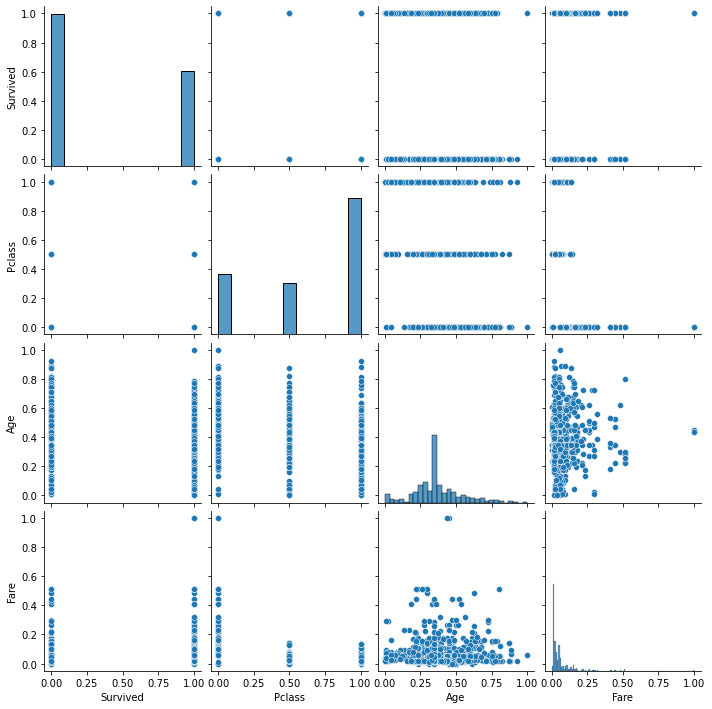

In [42]:
sns.pairplot(df_minmax)

<AxesSubplot:xlabel='Age', ylabel='Count'>

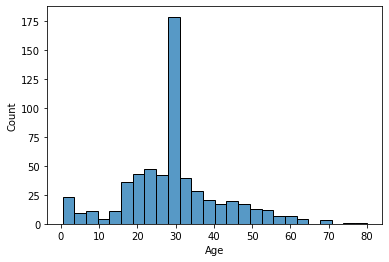

In [43]:
sns.histplot(data=X_train, x="Age")

<AxesSubplot:xlabel='Fare', ylabel='Count'>

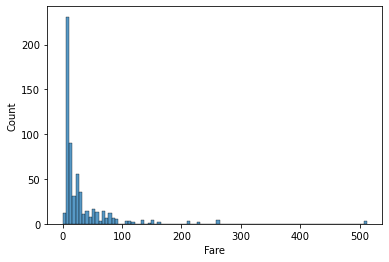

In [45]:
sns.histplot(data=X_train, x="Fare")

<AxesSubplot:xlabel='Fare', ylabel='Count'>

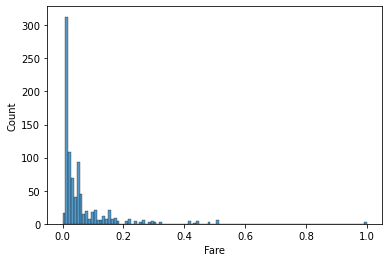

In [46]:
sns.histplot(data=df_minmax, x="Fare")

<AxesSubplot:xlabel='Age', ylabel='Count'>

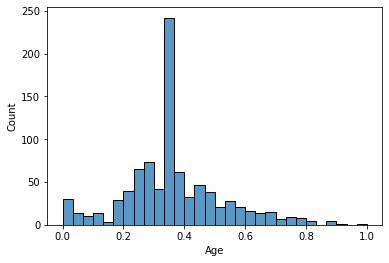

In [44]:
sns.histplot(data=df_minmax, x="Age")

Observation: Values now range from 0 to 1.

### Robust Scaler

Robust Scaler are robust to outliers. Scaling using median and quantities consists od substracting the median  to all the observations, and then dividing by the interqantile difference. <BR>
    
    IQR = 75th quantile - 25th quantile
  
    X_scaled = (X-X_median)/IQR
    
    

In [47]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_robust = pd.DataFrame(scaler.fit_transform(X_train))
df_robust.head()

,0,1,2
0,-2.0,2.000000,1.602069
1,0.0,0.000000,0.044788
2,-1.0,-0.230769,1.161670
3,0.0,-0.153846,0.000000
4,0.0,-0.461538,-0.168630


In [48]:
scaler.transform(X_test)

array([[ 0.00000000e+00,  0.00000000e+00,  3.39014989e-02],
       [-1.00000000e+00,  2.30769231e-01, -1.69344754e-01],
       [ 0.00000000e+00, -6.15384615e-01, -2.79623126e-01],
       [-1.00000000e+00, -1.69230769e+00,  7.94252677e-01],
       [ 0.00000000e+00, -1.07692308e+00, -1.37580300e-01],
       [-2.00000000e+00, -1.53846154e-01,  2.75785011e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.87117773e-01],
       [ 0.00000000e+00, -9.23076923e-01,  1.51854390e-01],
       [ 0.00000000e+00, -9.23076923e-01, -2.87117773e-01],
       [-2.00000000e+00, -6.92307692e-01,  5.06599572e-01],
       [-2.00000000e+00,  6.92307692e-01,  1.65506638e+00],
       [ 0.00000000e+00,  1.23076923e+00, -2.74269807e-01],
       [ 0.00000000e+00,  0.00000000e+00,  4.71627409e-01],
       [ 0.00000000e+00,  1.53846154e-01, -3.09601713e-01],
       [-1.00000000e+00,  6.15384615e-01, -6.22783726e-02],
       [-2.00000000e+00, -9.23076923e-01,  1.06834261e+00],
       [-2.00000000e+00,  1.07692308e+00

<AxesSubplot:xlabel='Fare', ylabel='Count'>

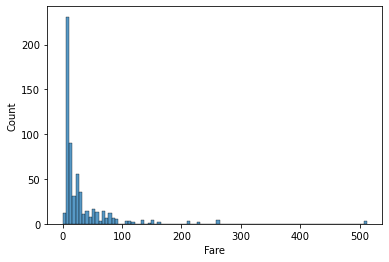

In [49]:
sns.histplot(data=X_train, x="Fare")

<AxesSubplot:xlabel='2', ylabel='Count'>

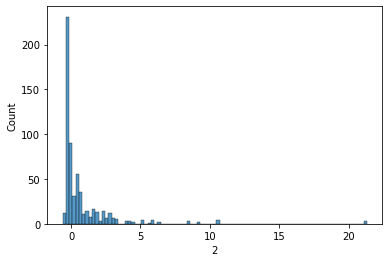

In [58]:
sns.histplot(data=df_robust[2])

In [56]:
df_robust

,0,1,2
0,-2.0,2.000000,1.602069
1,0.0,0.000000,0.044788
2,-1.0,-0.230769,1.161670
3,0.0,-0.153846,0.000000
4,0.0,-0.461538,-0.168630
...,...,...,...
591,0.0,-0.538462,-0.291400
592,-2.0,0.000000,0.708600
593,0.0,1.000000,-0.014814
594,-2.0,-1.076923,4.520163


In [57]:
df_robust[2]

0      1.602069
1      0.044788
2      1.161670
3      0.000000
4     -0.168630
         ...   
591   -0.291400
592    0.708600
593   -0.014814
594    4.520163
595    2.690934
Name: 2, Length: 596, dtype: float64

### Gaussian Transformation

Helpful with algorithms like Linear and Logistic Reg. as they assume that the features are normally distributed. (ANN Also)

* Logarithmic transformation
* Reciprocal transformation
* Square root transformation
* Exponential transformation
* Boxcox Transformation

These techniques can convert almost any distribution to Gaussian distribution.

We have to check experimentally to find which transformation will work in our case.

In [59]:
df = pd.read_csv('titanic.csv', usecols=['Pclass', 'Age', 'Fare', 'Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [60]:
df['Age'].fillna(df.Age.median(), inplace= True)

In [62]:
df['Age'].isnull().sum()

0

In [64]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [65]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab

In [68]:
## To check weather a feature is nomally or gaussian distributed we use:
## Q-Q plot

def plot_data(df, feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.show()

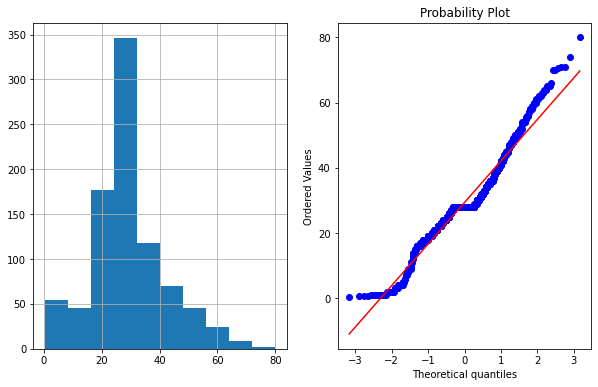

In [69]:
plot_data(df,'Age')

##if it probablity plot of a feature follows a straight line then it is Normally distributed

## data is right skewed

### Applying Logrithmic transformation

In [70]:
df['Age_log'] = np.log(df['Age'])
df.head()

,Survived,Pclass,Age,Fare,Age_log
0,0,3,22.0,7.2500,3.091042
1,1,1,38.0,71.2833,3.637586
2,1,3,26.0,7.9250,3.258097
3,1,1,35.0,53.1000,3.555348
4,0,3,35.0,8.0500,3.555348


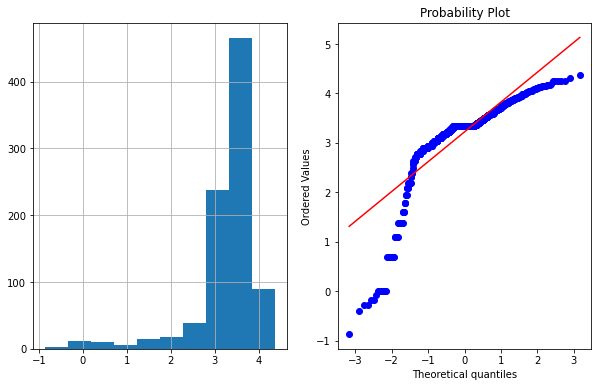

In [71]:
plot_data(df, 'Age_log')  #does not exactly follows the none 

#distribution is left skewed
#not a good option

### Reciprocal Transformation

In [72]:
df['Age_reciprocal'] = 1/df['Age']

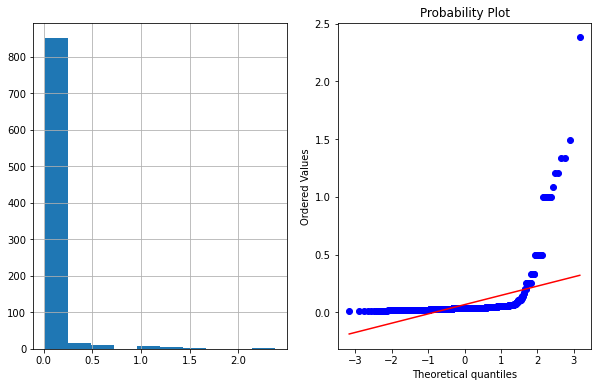

In [73]:
plot_data(df, 'Age_reciprocal') 
## Right skewed distribution

### Square Root Transformation 

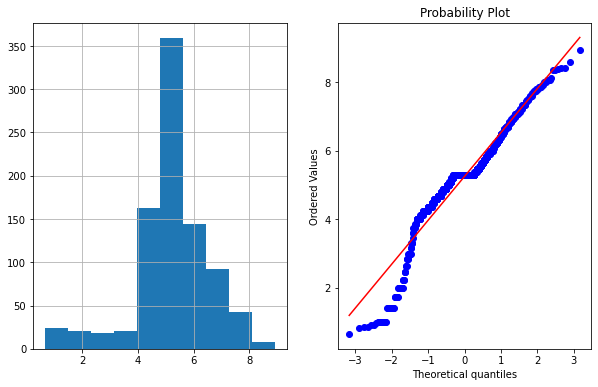

In [74]:
df['Age_sq'] = df.Age**(1/2)
plot_data(df, 'Age_sq')
#better 
#still a bit left skewed

### Exponential Transformation

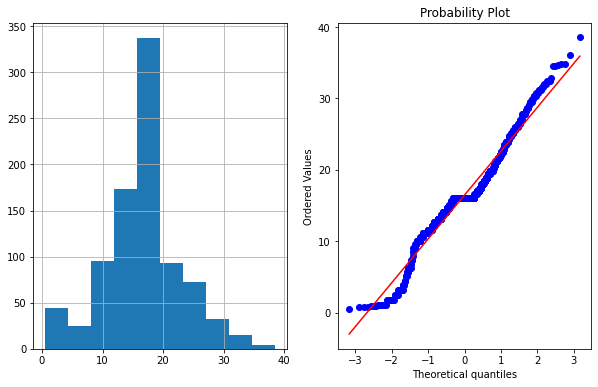

In [75]:
df['Age_exp'] = df.Age**(1/1.2)
plot_data(df, 'Age_exp')
#better result almost gaussian

### BoxCox Transformation

It is defined as:

T(Y) = (Y exp(lamda)-1)/lamda

where Y is response variable and lamda is the tansformation parameter, it varies from -5 to 5.
In the transformation, all values of lamda are considered and the optimal value for a given variable is selected.

In [76]:
df['Age_bxcx'], parameters = stat.boxcox(df['Age']) 

In [77]:
print(parameters)

0.7964531473656952


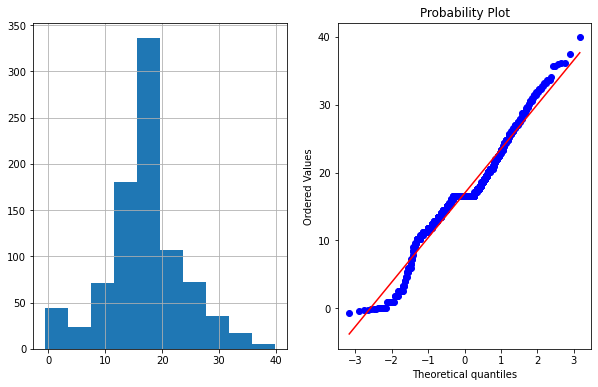

In [78]:
plot_data(df, 'Age_bxcx')

Observation: boxcox and exponential workds well for Age feature.